In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, tensor, qeye, sigmax, sigmaz, mesolve

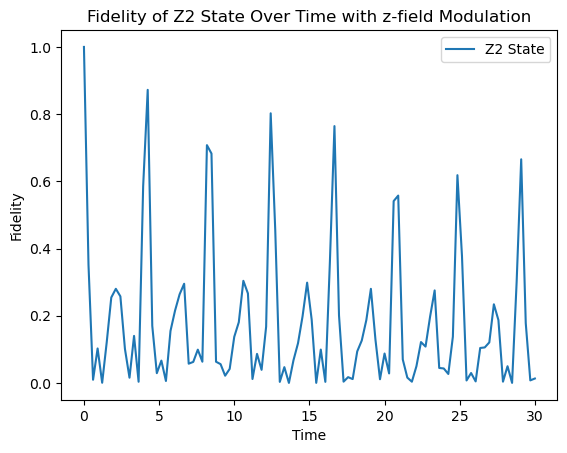

In [6]:
# Define parameters
N = 8  # Number of sites, modify as needed
Omega_max = 1.0  # Maximum PXP term strength
delta_max = 0.001# Maximum z-field term strength
T = 10  # Fixed step time in seconds
t_max = 30  # Maximum time for evolution in arbitrary units
n_steps = 100  # Number of time steps

# Ensure delta_max is smaller than Omega_max
assert delta_max < Omega_max, "delta_max must be smaller than Omega_max"

# Define the projectors onto the ground state
def P_j(j, N):
    op_list = [qeye(2) for _ in range(N)]
    op_list[j] = basis(2, 0) * basis(2, 0).dag()
    return tensor(op_list)

# Define the Pauli X operator at site j
def X_j(j, N):
    op_list = [qeye(2) for _ in range(N)]
    op_list[j] = sigmax()
    return tensor(op_list)

# Define the Pauli Z operator at site j
def Z_j(j, N):
    op_list = [qeye(2) for _ in range(N)]
    op_list[j] = sigmaz()
    return tensor(op_list)

# Construct the PXP Hamiltonian
H_PXP = 0
for j in range(N):
    P_j_minus = P_j((j - 1) % N, N)
    X_j_op = X_j(j, N)
    P_j_plus = P_j((j + 1) % N, N)
    H_PXP += P_j_minus * X_j_op * P_j_plus

H_PXP *= -Omega_max

# Construct the Z Hamiltonian
H_z = sum([Z_j(j, N) for j in range(N)]) * (delta_max / 2)

# Define the initial Z2 state with excitation on every other site
Z2_state = tensor([basis(2, (i % 2)) for i in range(N)])

# Time evolution parameters
tlist = np.linspace(0, t_max, n_steps)  # Time array

# Function to evolve the state using U(x_i)
def evolve_state(state, H_PXP, H_z, T, tlist, f_x):
    states = [state]
    for t in tlist[1:]:
        H = H_PXP + f_x(t) * H_z
        U = (-1j * H * T).expm()
        state = U * state
        states.append(state)
    return states

# Example modulation function f(x_i) = cos(omega * t)
omega = 2 * np.pi / T
f_x = lambda t: np.cos(omega * t)

# Evolve the system for Z2 state
states = evolve_state(Z2_state, H_PXP, H_z, T, tlist, f_x)

# Calculate fidelity with the initial Z2 state
fidelities_Z2 = [np.abs(Z2_state.overlap(state))**2 for state in states]

# Plot the fidelity over time for Z2 state
plt.plot(tlist, fidelities_Z2, label='Z2 State')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity of Z2 State Over Time with z-field Modulation')
plt.legend()
plt.show()

In [53]:
# Define parameters
N = 9  # Number of sites, modify as needed
Omega_max = 1.0 # Maximum PXP term strength
delta_max = 0.0 # Maximum z-field term strength
#T = 250 # Fixed step time in seconds
t_max = 50  # Maximum time for evolution in arbitrary units
n_steps = 1000  # Number of time steps

# Ensure delta_max is smaller than Omega_max
assert delta_max < Omega_max, "delta_max must be smaller than Omega_max"

# Define the projectors onto the ground state
def P_j(j, N):
    op_list = [qeye(2) for _ in range(N)]
    op_list[j] = basis(2, 0) * basis(2, 0).dag()
    return tensor(op_list)

# Define the Pauli X operator at site j
def X_j(j, N):
    op_list = [qeye(2) for _ in range(N)]
    op_list[j] = sigmax()
    return tensor(op_list)

# Define the Pauli Z operator at site j
def Z_j(j, N):
    op_list = [qeye(2) for _ in range(N)]
    op_list[j] = sigmaz()
    return tensor(op_list)

# Construct the PXP Hamiltonian
H_PXP = 0
for j in range(N):
    P_j_minus = P_j((j - 1) % N, N)
    X_j_op = X_j(j, N)
    P_j_plus = P_j((j + 1) % N, N)
    H_PXP += P_j_minus * X_j_op * P_j_plus

H_PXP *= -Omega_max

# Construct the Z Hamiltonian
H_z = sum([Z_j(j, N) for j in range(N)]) * (delta_max / 2)

# Define the initial Z2 state with excitation on every other site
Z2_state = tensor([basis(2, (i % 2)) for i in range(N)])

# Time evolution parameters
tlist = np.linspace(0, t_max, n_steps)  # Time array

# Define the time-dependent Hamiltonian function
def H_t(t, args):
    include_Hz = args['include_Hz']
    if include_Hz:
        return H_PXP + H_z
    else:
        return H_PXP

# Evolve the system
include_Hz = True  # Change to False to exclude H_z
args = {'include_Hz': include_Hz}
result = mesolve(H_t, Z2_state, tlist, [], [], args=args)

# Calculate fidelity with the initial Z2 state
fidelities_Z2 = [np.abs(Z2_state.overlap(state))**2 for state in result.states]

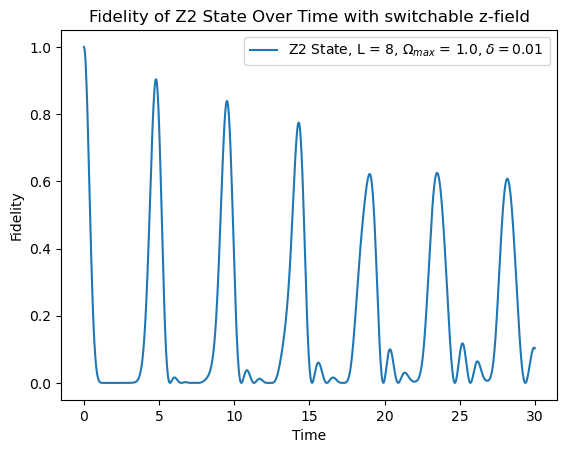

In [40]:
# Plot the fidelity over time for Z2 state
plt.plot(tlist, fidelities_Z2, label= r'Z2 State, L = 8, $\Omega_{max}$ = 1.0, $\delta = 0.01$ ')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity of Z2 State Over Time with switchable z-field')
plt.legend()
plt.show()

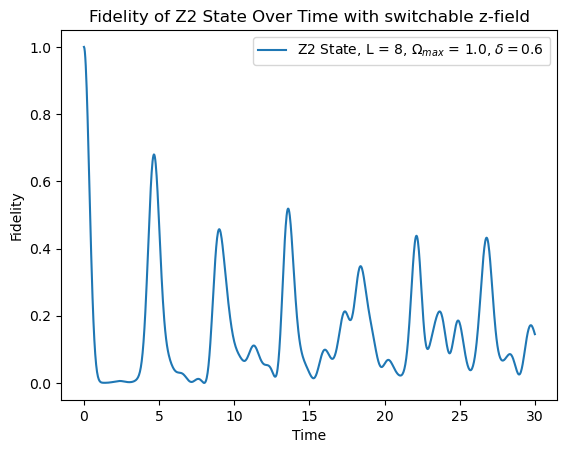

In [42]:
# Plot the fidelity over time for Z2 state
plt.plot(tlist, fidelities_Z2, label= r'Z2 State, L = 8, $\Omega_{max}$ = 1.0, $\delta = 0.6$ ')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity of Z2 State Over Time with switchable z-field')
plt.legend()
plt.show()

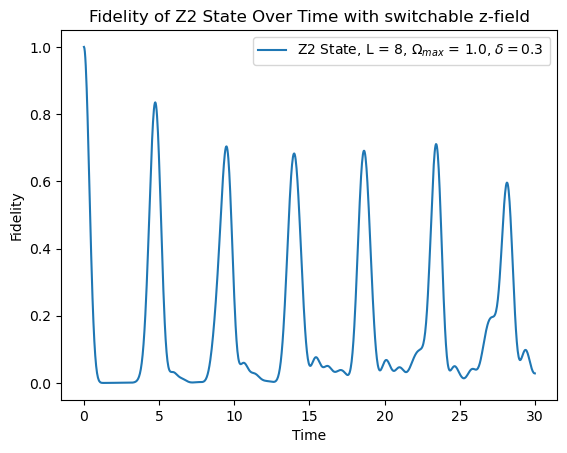

In [44]:
# Plot the fidelity over time for Z2 state
plt.plot(tlist, fidelities_Z2, label= r'Z2 State, L = 8, $\Omega_{max}$ = 1.0, $\delta = 0.3$ ')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity of Z2 State Over Time with switchable z-field')
plt.legend()
plt.show()

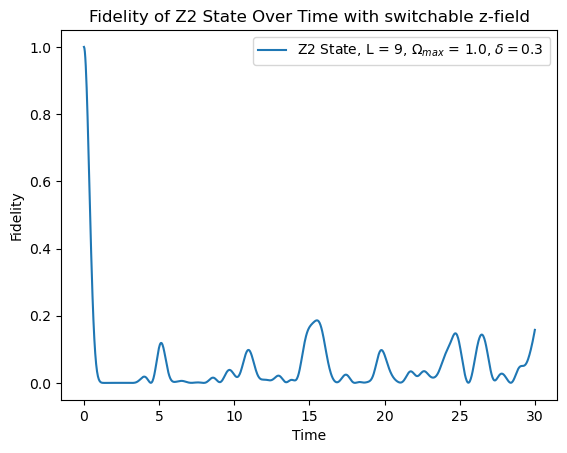

In [46]:
# Plot the fidelity over time for Z2 state
plt.plot(tlist, fidelities_Z2, label= r'Z2 State, L = 9, $\Omega_{max}$ = 1.0, $\delta = 0.3$ ')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity of Z2 State Over Time with switchable z-field')
plt.legend()
plt.show()

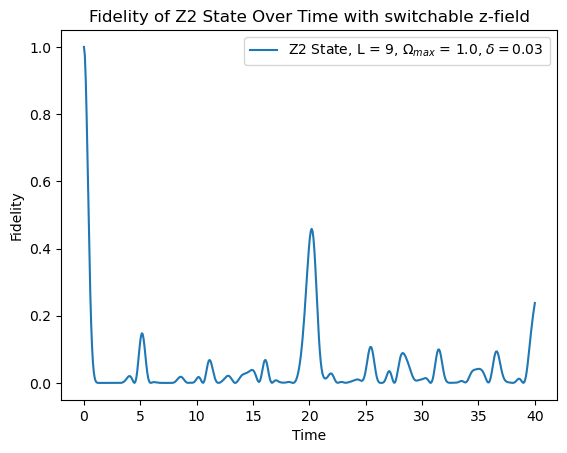

In [48]:
# Plot the fidelity over time for Z2 state
plt.plot(tlist, fidelities_Z2, label= r'Z2 State, L = 9, $\Omega_{max}$ = 1.0, $\delta = 0.03$ ')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity of Z2 State Over Time with switchable z-field')
plt.legend()
plt.show()

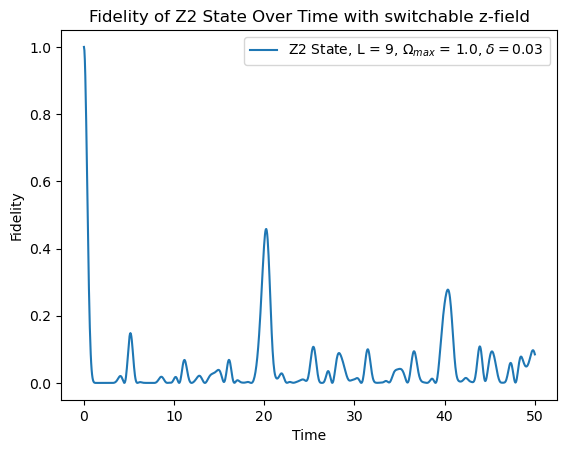

In [50]:
# Plot the fidelity over time for Z2 state
plt.plot(tlist, fidelities_Z2, label= r'Z2 State, L = 9, $\Omega_{max}$ = 1.0, $\delta = 0.03$ ')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity of Z2 State Over Time with switchable z-field')
plt.legend()
plt.show()

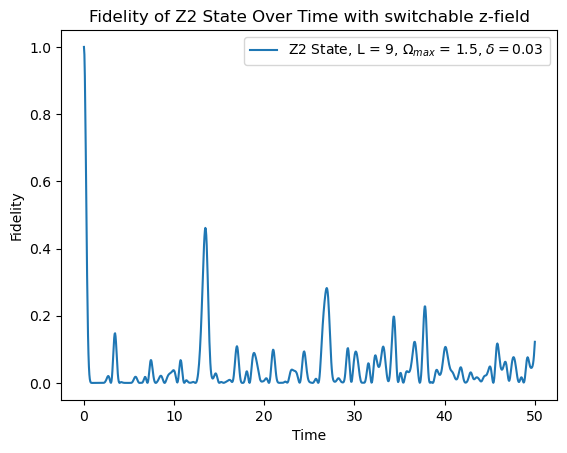

In [52]:
# Plot the fidelity over time for Z2 state
plt.plot(tlist, fidelities_Z2, label= r'Z2 State, L = 9, $\Omega_{max}$ = 1.5, $\delta = 0.03$ ')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity of Z2 State Over Time with switchable z-field')
plt.legend()
plt.show()

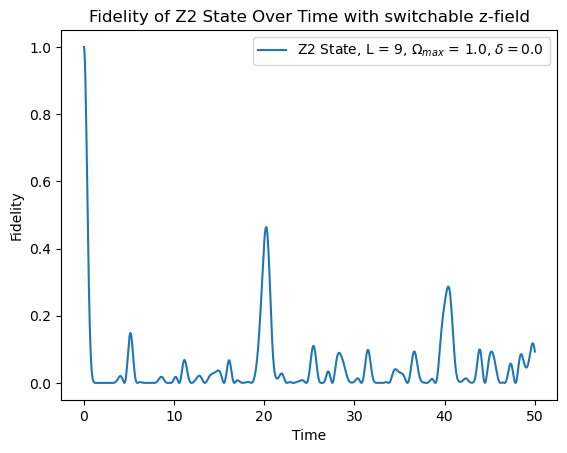

In [54]:
# Plot the fidelity over time for Z2 state
plt.plot(tlist, fidelities_Z2, label= r'Z2 State, L = 9, $\Omega_{max}$ = 1.0, $\delta = 0.0$ ')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity of Z2 State Over Time with switchable z-field')
plt.legend()
plt.show()